<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Neural-Network-Classifier" data-toc-modified-id="Neural-Network-Classifier-1">Neural Network Classifier</a></span></li><li><span><a href="#Apply-NeuralNetworkClassifier-to-Handwritten-Digits" data-toc-modified-id="Apply-NeuralNetworkClassifier-to-Handwritten-Digits-2">Apply <code>NeuralNetworkClassifier</code> to Handwritten Digits</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-3">Experiments</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-4">Grading</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-5">Extra Credit</a></span></li></ul></div>

# Neural Network Classifier

You may start with your `NeuralNetwork` class from A2, or start with the [implementation defined here](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A2solution.tar) in which all functions meant be called by other functions in this class start with an underscore character. Implement the subclass `NeuralNetworkClassifier` that extends `NeuralNetwork` as discussed in class.  Your `NeuralNetworkClassifier` implementation should rely on inheriting functions from `NeuralNetwork` as much as possible. 

Your `neuralnetworks.py` file (notice it is plural) will now contain two classes, `NeuralNetwork` and `NeuralNetworkClassifier`.

In `NeuralNetworkClassifier` replace the `error_f` function with one called `_neg_log_likelihood_f` and pass it instead of `error_f` into the optimization functions.

Here are some example tests.

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import numpy as np
import neuralnetworks as nn
import matplotlib.pyplot as plt
%matplotlib notebook

In [32]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
T = np.array([[0], [1], [1], [0]])
X, T

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [33]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [34]:
print(nnet)

NeuralNetwork(2, [10], 2)


In [35]:
nnet.Ws

[array([[0.35343662, 0.09761247, 0.25175879, 0.4441339 , 0.17050614,
         0.08611927, 0.01297787, 0.24261672, 0.1378032 , 0.19494589],
        [0.57198811, 0.13725143, 0.0468766 , 0.38659388, 0.35867477,
         0.15834035, 0.26917306, 0.06833965, 0.04269942, 0.52006221],
        [0.4583945 , 0.48530311, 0.47066025, 0.57212805, 0.3332892 ,
         0.46982855, 0.24324799, 0.01584709, 0.26219591, 0.06081004]]),
 array([[0.24640112, 0.21037283],
        [0.17043996, 0.08268264],
        [0.30105116, 0.04162125],
        [0.18555481, 0.14624395],
        [0.12212025, 0.21945476],
        [0.09733206, 0.12076903],
        [0.09617199, 0.28559813],
        [0.27700099, 0.24538331],
        [0.01027463, 0.28443762],
        [0.28656819, 0.24319635],
        [0.14511079, 0.29148887]])]

The `softmax` function can produce errors if the denominator is close to zero.  Here is an implentation you may use to avoid some of those errors.  This assumes you have the following import in your `neuralnetworks.py` file.

`sys.float_info.epsilon` is also useful in your `_neg_log_likehood_f` function to avoid taking the `log` of zero.

In [36]:
import sys  # for sys.float_info.epsilon 

In [37]:
    def _softmax(self, Y):
        '''Apply to final layer weighted sum outputs'''
        # Trick to avoid overflow
        maxY = Y.max()       
        expY = np.exp(Y - maxY)
        denom = expY.sum(1).reshape((-1, 1))
        Y = expY / (denom + sys.float_info.epsilon)
        return Y

Replace the `error_f` function with `neg_log_likelihood`.  If you add some print statements in `_neg_log_likelihood` functions, you can compare your output to the following results.

In [38]:
nnet.train(X, T, n_epochs=1, method='sgd', learning_rate=0.01)

sgd: Epoch 1 ObjectiveF=0.70718


NeuralNetwork(2, [10], 2)

In [39]:
print(nnet)

NeuralNetwork(2, [10], 2)
 Trained for 1 epochs.
 Final standardized training error 0.7072.


Now if you comment out those print statements, you can run for more epochs without tons of output.

In [40]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [41]:
nnet.train(X, T, 100, method='scg')

SCG: Epoch 10 ObjectiveF=0.99632
SCG: Epoch 20 ObjectiveF=0.99996
SCG: Epoch 30 ObjectiveF=1.00000


NeuralNetwork(2, [10], 2)

The `use()` function returns two `numpy` arrays. The first one are the class predictions for eachs sample, containing values from the set of unique values in `T` passed into the `train()` function.

The second value are the probabilities of each class for each sample. This should a column for each unique value in `T`.

In [42]:
nnet.use(X)

(array([[0],
        [1],
        [1],
        [0]]),
 array([[9.99999991e-01, 9.38296242e-09],
        [1.13219617e-08, 9.99999989e-01],
        [8.63243119e-09, 9.99999991e-01],
        [9.99999990e-01, 9.87947201e-09]]))

In [43]:
def percent_correct(Y, T):
    return np.mean(T == Y) * 100

In [44]:
percent_correct(nnet.use(X)[0], T)

100.0

Works!  The XOR problem was used early in the history of neural networks as a problem that cannot be solved with a linear model.  Let's try it.  It turns out our neural network code can do this if we use an empty list for the hidden unit structure!

In [45]:
nnet = nn.NeuralNetworkClassifier(2, [], 2)
nnet.train(X, T, 100, method='scg')

NeuralNetwork(2, [], 2)

In [46]:
nnet.use(X)

(array([[0],
        [1],
        [0],
        [1]]),
 array([[0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5]]))

In [47]:
percent_correct(nnet.use(X)[0], T)

50.0

A second way to evaluate a classifier is to calculate a confusion matrix. This shows the percent accuracy for each class, and also shows which classes are predicted in error.

Here is a function you can use to show a confusion matrix.

In [64]:
import pandas

def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    # cf.style.background_gradient(cmap='Blues').format("{:.1f} %")
    print('Percent Correct')
    return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")

In [65]:
confusion_matrix(nnet.use(X)[0], T)

Percent Correct


# Apply `NeuralNetworkClassifier` to Handwritten Digits

Apply your `NeuralNetworkClassifier` to the [MNIST digits dataset](https://www.cs.colostate.edu/~anderson/cs545/notebooks/mnist.pkl.gz).

In [21]:
import pickle
import gzip

In [22]:
with gzip.open('../code/mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


In [23]:
28*28

784

In [24]:
def draw_image(image, label):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(label)

<IPython.core.display.Javascript object>


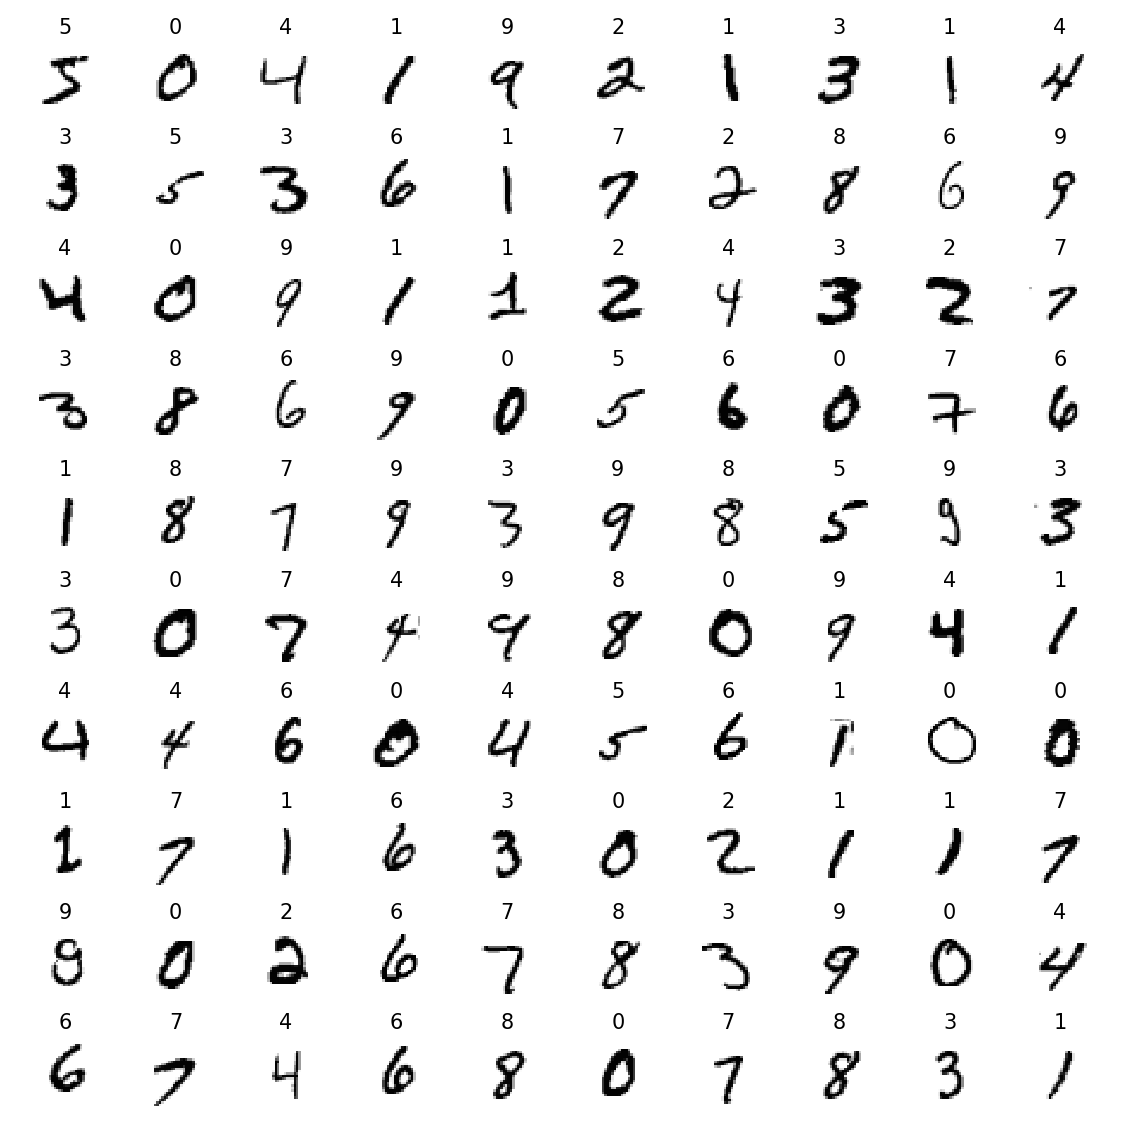

In [25]:
plt.figure(figsize=(9, 9))
for i in range(100):
#     print(i)
    plt.subplot(10, 10, i+1)
    draw_image(Xtrain[i], Ttrain[i,0])
plt.tight_layout()

In [26]:
nnet = nn.NeuralNetworkClassifier(784, [], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='scg')

SCG: Epoch 4 ObjectiveF=0.95819
SCG: Epoch 8 ObjectiveF=0.96994
SCG: Epoch 12 ObjectiveF=0.97146
SCG: Epoch 16 ObjectiveF=0.97146
SCG: Epoch 20 ObjectiveF=0.97146
SCG: Epoch 24 ObjectiveF=0.97273
SCG: Epoch 28 ObjectiveF=0.97421
SCG: Epoch 32 ObjectiveF=0.97475
SCG: Epoch 36 ObjectiveF=0.97494
SCG: Epoch 40 ObjectiveF=0.97496


NeuralNetwork(784, [], 10)

In [27]:
print(nnet)

NeuralNetwork(784, [], 10)
 Trained for 40 epochs.
 Final standardized training error 0.975.


In [30]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

[93.138, 92.65, 92.28]

In [31]:
nnet = nn.NeuralNetworkClassifier(784, [20], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='scg')

SCG: Epoch 4 ObjectiveF=0.88560
SCG: Epoch 8 ObjectiveF=0.95820
SCG: Epoch 12 ObjectiveF=0.97325
SCG: Epoch 16 ObjectiveF=0.97961
SCG: Epoch 20 ObjectiveF=0.98322
SCG: Epoch 24 ObjectiveF=0.98575
SCG: Epoch 28 ObjectiveF=0.98762
SCG: Epoch 32 ObjectiveF=0.98896
SCG: Epoch 36 ObjectiveF=0.98981
SCG: Epoch 40 ObjectiveF=0.99067


NeuralNetwork(784, [20], 10)

In [32]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[97.47200000000001, 94.21000000000001, 93.62]

# Experiments

For each method, try various hidden layer structures, learning rates, and numbers of epochs.  Use the validation percent accuracy to pick the best hidden layers, learning rates and numbers of epochs for each method (ignore learning rates for scg).  Report training, validation and test accuracy for your best validation results for each of the three methods.

Include plots of data likelihood versus epochs, and confusion matrices, for best results for each method.

Write at least 10 sentences about what you observe in the likelihood plots, the train, validation and test accuracies, and the confusion matrices.

# Showing Correctly downloaded and read the MNIST data.


In [75]:
import pickle
import gzip

!curl -O https://www.cs.colostate.edu/~anderson/cs545/notebooks/mnist.pkl.gz
with gzip.open('./mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape) 
 


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15.4M  100 15.4M    0     0  94.5M      0 --:--:-- --:--:-- --:--:-- 94.5M
(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


In [67]:
Xtrain


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
import pickle
import gzip


!curl -O https://www.cs.colostate.edu/~anderson/cs545/notebooks/mnist.pkl.gz


import neuralnetworks as nn

with gzip.open('./mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')


def draw_image(image, label):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(label)


N=500
Xtrain = train_set[0][:N]
Ttrain = train_set[1][:N].reshape(-1, 1)

Xval = valid_set[0][:N]
Tval = valid_set[1][:N].reshape(-1, 1)

Xtest = test_set[0][:N]
Ttest = test_set[1][:N].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

def percent_correct(Y, T):
    return np.mean(T == Y) * 100


def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    # cf.style.background_gradient(cmap='Blues').format("{:.1f} %")
    print('Percent Correct')
    return conf_matrix

epochsS=[20, 40, 60, 80,100 ,120]
hiddensS=[[],[20, 20],[5,5,5,5],[2,2,2,2,2],[10],[30],[10,15]]
learning_rateS=[0.01, 0.05, 0.02,0.04,0.005]
methods = [ 'scg', 'adam', 'sgd']

BestAccuracy= -1000
BestConfiguration=[]

for i in range(100):
    epochs=epochsS[np.random.randint(len(epochsS))]
    hiddens=hiddensS[np.random.randint(len(hiddensS))]
    learning_rate=learning_rateS[np.random.randint(len(learning_rateS))]
    method=methods[np.random.randint(len(methods))]
    n_classes = len(np.unique(Ttrain))
    nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], hiddens, n_classes)
    if method == 'scg':
        nnet.train(Xtrain, Ttrain, epochs, method, verbose=False)
    else:
        nnet.train(Xtrain, Ttrain, epochs, method, learning_rate, verbose=False)
#   conf_matrix=confusion_matrix(nnet.use(Xtest)[0], Ttest)
#   conf_matrix = conf_matrix.round(2)
#   print(conf_matrix)
    accuracy=percent_correct(nnet.use(Xtest)[0], Ttest)
    print(i, end = ': ')
    print([method, hiddens,learning_rate,epochs],end = ';    ')
    print(accuracy)
    if (accuracy>BestAccuracy):
        BestAccuracy=accuracy
        BestConfiguration=[method, hiddens,learning_rate,epochs]

print("---------------------------------------------")
print(BestAccuracy)
print(BestConfiguration)

[method, hiddens,learning_rate,epochs]=BestConfiguration


n_classes = len(np.unique(Ttrain))
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], hiddens, n_classes)
if method == 'scg':
    nnet.train(Xtrain, Ttrain, epochs, method, verbose=False)
else:
    nnet.train(Xtrain, Ttrain, epochs, method, learning_rate, verbose=False)

accuracy=percent_correct(nnet.use(Xtest)[0], Ttest)
print(accuracy)
conf_matrix=confusion_matrix(nnet.use(Xtest)[0], Ttest)
conf_matrix = conf_matrix.round(2)
print(conf_matrix)

plt.figure()
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');
plt.show()



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15.4M  100 15.4M    0     0  96.9M      0 --:--:-- --:--:-- --:--:-- 96.9M
(500, 784) (500, 1) (500, 784) (500, 1) (500, 784) (500, 1)
0: ['scg', [], 0.01, 120];    80.80000000000001
1: ['sgd', [], 0.02, 80];    78.0
2: ['adam', [20, 20], 0.05, 40];    70.19999999999999
3: ['sgd', [], 0.05, 20];    69.19999999999999
4: ['adam', [20, 20], 0.005, 60];    75.2
5: ['sgd', [5, 5, 5, 5], 0.02, 20];    10.0
6: ['adam', [10, 15], 0.01, 40];    64.8
7: ['scg', [2, 2, 2, 2, 2], 0.05, 120];    23.0
8: ['scg', [20, 20], 0.05, 40];    76.8
9: ['adam', [2, 2, 2, 2, 2], 0.01, 20];    23.799999999999997
10: ['scg', [10, 15], 0.01, 40];    69.6


KeyboardInterrupt: 

# This is my Discussion:




1. The Data set with 50000 images is too large, I used first 500 as traning and testing.
2. Even remotly using HPC still take a long time. codewise, I would try to parallelize the test function with openMPI. I would like to try that if I have time. 
3.scg has oscillations because it is a  method using learning_rateS. it can overshoot sometimes when the error goes to 0
4.Adam has oscillations at later iterationsbecause it is a  method using learning_rateS. it can overshoot sometimes when the error goes to 0
5. For the same setup for method, learning rate, hidden layers, increaseing the epochs will generally get a  better resutl, becasue we are using gradient-based method.
6. For the same setup for learning rate, hidden layers,epochs. SCG performs generally better than ADAM 
7. For the same setup for learning rate, hidden layers,epochs. SCG performs generally better than ADAM 
8. For the same setup for learning rate, hidden layers,epochs. ADAM performs generally better than SGD 
9.  For the same setup for learning rate, hidden layers,epochs. ADAM performs generally better than SGD 
10. the hidden layer  [2, 2, 2, 2, 2] generally does not result in good results. Interesting
11. Put too many layer does not signifantly increase the results. computational cost should evenly distributed to 
number of layers and the number of neurons.
12. For Big matrix calculations, instead of openMPI it by parallize the configuration, there are someways to paralleize the matrix calcutions. Should be promising, but will not be effcient as parallize by configurations.
13. setting the learning_rate too big is not good for ADAM, but it can converge.
14. setting the learning_rate too big is not good for SGD, Sometimes it can produce abnormally large values.
15. The best configuration I got is:
accuracy 82.8
['scg', [30], 0.01, 40]. Looks like choosing the correct optimizer SCG is more important than other parameters.
16. The MNIST data zip is 16MB. 
17. Unzip it produce a big 200~ MB files. The compress rate is just amazing. 
18. I wonder if it used a similar comression method like the "PNG" format.
19. The first lines indicate the file is a numpy data format. 
20. Look into the gz file, it looks there are no big blocks of 0, indicating it is well compressed. However, if I delete a digits at some location, the whole file is corrupted, makes the compressing method weak when trensfered using SSB modulation or other simialr methods.

 

# Grading

Download [A3grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A3grader.tar), extract `A3grader.py` before running the following cell.

In [73]:
%run -i A3grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Chen-A3.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

## Testing inheritance ####################################################################

    correct = issubclass(NeuralNetworkClassifier, NeuralNetwork)


--- 10/10 points. NeuralNetworkClassifier correctly extends NeuralNetwork.

## Testing inheritance ####################################################################

    import inspect
    forward_func = [f for f in inspect.classify_class_attrs(NeuralNetworkClassifier) if (f.name == 'forward' or f.name == '_forward')]
    correct = forward_func[0].defining_class == NeuralNetwork


--- 5/5 points. NeuralNetworkClassifier forward function correctly inherited from NeuralNetwork.

## Testing inheritance ####################################################################

    import inspect
    s

# Extra Credit

Repeat the above experiments with a different data set.  Randonly partition your data into training, validaton and test parts if not already provided.  Write in markdown cells descriptions of the data and your results.